## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## File Descriptions

- train.csv: Contains 172 columns. The primary key that represents each customer is id. The target variable that you need to predict is churn_probability which contains a value of 0 or 1. This data is what you are going to use for EDA, cleaning, feature engineering, model building, model evaluation, model selection, and finally model training.

- test.csv: Contains 171 columns, doesn't contain the target variable churn_probability. You will apply all the necessary preprocessing steps to get this data into the right format and then use the model trained using the train.csv file to make predictions with this. This is unseen data! Only the competition hosts know the actual values of the target feature for this data and therefore your submissions will be evaluated on how well your model does with this dataset.

- sample.csv: This contains the format in which you need to submit the solutions to Kaggle. The id column in this dataset exactly the same as the id column in test.csv. You will make your predictions on the test.csv data and store them in a submission file that has the same format as this file. Check the Overview>Evaluation tab for mode details.

- data_dictionary.csv: This contains the definitions for the various acronyms that you will need to understand each variable. For example, the variable total_og_mou_7, contains the acronyms total, og, mou, and 7, which can be translated as the total outgoing minutes of voice calls made by the user in month of July.

## Data Definitions
The definitions are also listed down below:

    CIRCLE_ID : Telecom circle area to which the customer belongs to
    LOC : Local calls - within same telecom circle
    STD : STD calls - outside the calling circle
    IC : Incoming calls
    OG : Outgoing calls
    T2T : Operator T to T, i.e. within same operator (mobile to mobile)
    T2M : Operator T to other operator mobile
    T2O : Operator T to other operator fixed line
    T2F : Operator T to fixed lines of T
    T2C : Operator T to it’s own call center
    ARPU : Average revenue per user
    MOU : Minutes of usage - voice calls
    AON : Age on network - number of days the customer is using the operator T network
    ONNET : All kind of calls within the same operator network
    OFFNET : All kind of calls outside the operator T network
    ROAM : Indicates that customer is in roaming zone during the call
    SPL : Special calls
    ISD : ISD calls
    RECH : Recharge
    NUM : Number
    AMT : Amount in local currency
    MAX : Maximum
    DATA : Mobile internet
    3G : 3G network
    AV : Average
    VOL : Mobile internet usage volume (in MB)
    2G : 2G network
    PCK : Prepaid service schemes called - PACKS
    NIGHT : Scheme to use during specific night hours only
    MONTHLY : Service schemes with validity equivalent to a month
    SACHET : Service schemes with validity smaller than a month
    *.6 : KPI for the month of June
    *.7 : KPI for the month of July
    *.8 : KPI for the month of August
    FB_USER : Service scheme to avail services of Facebook and similar social networking sites
    VBC : Volume based cost - when no specific scheme is not purchased and paid as per usage

## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the CSV file

In [5]:
df = pd.read_csv("train.csv")
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [6]:
df.shape

(69999, 172)

In [7]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [8]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

125 columns out of 172 have missing values

In [9]:
# Check any number of columns with NaN or missing values 
print(df.isnull().any().sum(), ' / ', len(df.columns))

125  /  172


In [10]:
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

59715  /  69999


In [11]:
df.size

12039828

Dropping duplicates values if any

In [12]:
df.drop_duplicates()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


Printing Missing values in each column in terms of percentage

In [13]:
print("Missing values in terms of Percentage")

for column in df:
    percent = (df[column].isnull().sum() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
loc_og_t2o_mou has 1.0028714695924228% missing values
std_og_t2o_mou has 1.0028714695924228% missing values
loc_ic_t2o_mou has 1.0028714695924228% missing values
last_date_of_month_7 has 0.570008142973471% missing values
last_date_of_month_8 has 1.0471578165402362% missing values
onnet_mou_6 has 3.954342204888641% missing values
onnet_mou_7 has 3.8386262660895154% missing values
onnet_mou_8 has 5.2900755725081785% missing values
offnet_mou_6 has 3.954342204888641% missing values
offnet_mou_7 has 3.8386262660895154% missing values
offnet_mou_8 has 5.2900755725081785% missing values
roam_ic_mou_6 has 3.954342204888641% missing values
roam_ic_mou_7 has 3.8386262660895154% missing values
roam_ic_mou_8 has 5.2900755725081785% missing values
roam_og_mou_6 has 3.954342204888641% missing values
roam_og_mou_7 has 3.8386262660895154% missing values
roam_og_mou_8 has 5.2900755725081785% missing values
loc_og_t2t_mou_6 has 3.954342204888641% missing values
loc

In [14]:
df['fb_user_8'].isnull().sum()

51582

The dataset has three dtypes (int64,float64,Object)

In [15]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

Converting date columns from object dtype to datetime

In [16]:
conv_to_dt = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

In [17]:
for col in conv_to_dt:
    df[col] = pd.to_datetime(df[col])
    df[col] = df[col].dt.day

In [18]:
df[conv_to_dt].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   last_date_of_month_6      69999 non-null  int64  
 1   last_date_of_month_7      69600 non-null  float64
 2   last_date_of_month_8      69266 non-null  float64
 3   date_of_last_rech_6       68898 non-null  float64
 4   date_of_last_rech_7       68765 non-null  float64
 5   date_of_last_rech_8       67538 non-null  float64
 6   date_of_last_rech_data_6  17568 non-null  float64
 7   date_of_last_rech_data_7  17865 non-null  float64
 8   date_of_last_rech_data_8  18417 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.8 MB


In [19]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [20]:
df[conv_to_dt].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   last_date_of_month_6      69999 non-null  int64  
 1   last_date_of_month_7      69600 non-null  float64
 2   last_date_of_month_8      69266 non-null  float64
 3   date_of_last_rech_6       68898 non-null  float64
 4   date_of_last_rech_7       68765 non-null  float64
 5   date_of_last_rech_8       67538 non-null  float64
 6   date_of_last_rech_data_6  17568 non-null  float64
 7   date_of_last_rech_data_7  17865 non-null  float64
 8   date_of_last_rech_data_8  18417 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.8 MB


In [21]:
df[conv_to_dt].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,30,31.0,31.0,22.0,10.0,24.0,NaN,NaN,NaN
1,30,31.0,31.0,12.0,10.0,26.0,NaN,8.0,NaN
2,30,31.0,31.0,11.0,22.0,24.0,NaN,NaN,NaN
3,30,31.0,31.0,15.0,21.0,25.0,NaN,NaN,NaN
4,30,31.0,31.0,25.0,26.0,30.0,25.0,23.0,20.0


Filling last date of the month columns with their respective last date

In [22]:
df[['last_date_of_month_7','last_date_of_month_8']].fillna(31.0,inplace=True)

In [23]:
df['last_date_of_month_6'].fillna(30,inplace=True)

Fill null values of days to 0

In [24]:
df[conv_to_dt].fillna(0,inplace=True)

Filling all the null values with 0, indicating 0 usage/transaction value

In [25]:
df.fillna(0,inplace=True)

In [26]:
df.isnull().sum()

id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 172, dtype: int64

In [27]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [28]:
print("Missing values in terms of Percentage")

for column in df:
    percent = (df[column].isnull().sum() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage


In [29]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      int64  
 6    last_date_of_month_7      float64
 7    last_date_of_month_8      float64
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [30]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,30.0,30.823297,30.675381,283.134365,278.185912,...,0.081444,0.085487,0.229975,0.232132,0.234246,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,0.0,2.333802,3.155622,334.213918,344.366927,...,0.634547,0.680035,0.420819,0.422196,0.423530,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,30.0,0.000000,0.000000,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,93.581000,86.714000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,197.484000,191.588000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,370.791000,365.369500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,27731.088000,35145.834000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


### Handling outliers

In [31]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,30.0,30.823297,30.675381,283.134365,278.185912,...,0.081444,0.085487,0.229975,0.232132,0.234246,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,0.0,2.333802,3.155622,334.213918,344.366927,...,0.634547,0.680035,0.420819,0.422196,0.423530,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,30.0,0.000000,0.000000,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
1%,699.980000,109.0,0.0,0.0,0.0,30.0,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.00000,0.000000
10%,6999.800000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,32.248600,29.761200,...,0.000000,0.000000,0.000000,0.000000,0.000000,286.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,93.581000,86.714000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,197.484000,191.588000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,370.791000,365.369500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
90%,62998.200000,109.0,0.0,0.0,0.0,30.0,31.000000,31.000000,619.993800,615.661400,...,0.000000,0.000000,1.000000,1.000000,1.000000,2792.000000,160.444000,136.272000,110.32800,1.000000


Capping 0.01 and 0.99 percentile outliers

In [32]:
for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

In [33]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.0,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,30.0,31.0,30.675381,276.926861,271.901058,...,0.054929,0.055872,0.229975,0.232132,0.234246,1220.188946,60.651021,58.393407,52.577735,0.101887
std,20195.132284,0.0,0.0,0.0,0.0,0.0,0.0,3.155622,268.478830,269.419465,...,0.281017,0.283716,0.420819,0.422196,0.423530,951.019424,200.381350,199.688297,185.097042,0.302502
min,699.980000,109.0,0.0,0.0,0.0,30.0,31.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
1%,699.999600,109.0,0.0,0.0,0.0,30.0,31.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
10%,6999.800000,109.0,0.0,0.0,0.0,30.0,31.0,31.000000,32.248600,29.761200,...,0.000000,0.000000,0.000000,0.000000,0.000000,286.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,30.0,31.0,31.000000,93.581000,86.714000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,30.0,31.0,31.000000,197.484000,191.588000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.000000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,30.0,31.0,31.000000,370.791000,365.369500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.000000,0.000000
90%,62998.200000,109.0,0.0,0.0,0.0,30.0,31.0,31.000000,619.993800,615.661400,...,0.000000,0.000000,1.000000,1.000000,1.000000,2792.000000,160.444000,136.272000,110.328000,1.000000


In [34]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

Setting ID as index

In [35]:
df.set_index('id',inplace=True)

In [36]:
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
699.98,109,0.0,0.0,0.0,30,31.0,31.0,31.277,87.009,7.527,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
699.98,109,0.0,0.0,0.0,30,31.0,31.0,0.000,122.787,42.953,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
699.98,109,0.0,0.0,0.0,30,31.0,31.0,60.806,103.176,0.000,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
699.98,109,0.0,0.0,0.0,30,31.0,31.0,156.362,205.260,111.095,...,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
699.98,109,0.0,0.0,0.0,30,31.0,31.0,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [37]:
df[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].value_counts()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou
0.0             0.0             0.0               69999
dtype: int64

Dropping columns have 1 unique values, as this information would become irrelevant

In [38]:
df = df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [39]:
# for col in df.columns:
#     print(df[col].value_counts())

In [40]:
col_to_drop = ['circle_id','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

df = df.drop(columns=col_to_drop,axis=1)

In [41]:
# for col in df.columns:
#     print(df[col].value_counts())

In [42]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 69999 entries, 699.98 to 69298.02
Data columns (total 158 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    onnet_mou_6               float64
 4    onnet_mou_7               float64
 5    onnet_mou_8               float64
 6    offnet_mou_6              float64
 7    offnet_mou_7              float64
 8    offnet_mou_8              float64
 9    roam_ic_mou_6             float64
 10   roam_ic_mou_7             float64
 11   roam_ic_mou_8             float64
 12   roam_og_mou_6             float64
 13   roam_og_mou_7             float64
 14   roam_og_mou_8             float64
 15   loc_og_t2t_mou_6          float64
 16   loc_og_t2t_mou_7          float64
 17   loc_og_t2t_mou_8          float64
 18   loc_og_t2m_mou_6          float64
 19   loc_og_t2m_mou_7          float64


In [43]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,276.926861,271.901058,272.341811,120.747130,121.224215,118.333505,184.197691,182.341078,178.947790,7.202796,...,0.054929,0.055872,0.229975,0.232132,0.234246,1220.188946,60.651021,58.393407,52.577735,0.101887
std,268.478830,269.419465,273.950117,237.768446,243.753462,239.824631,263.554912,265.383818,261.521972,29.059940,...,0.281017,0.283716,0.420819,0.422196,0.423530,951.019424,200.381350,199.688297,185.097042,0.302502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
25%,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000
50%,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.000000,0.000000
75%,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.000000,0.000000
max,1400.276640,1414.891380,1445.054800,1429.040400,1461.342200,1448.891000,1520.310000,1517.838600,1492.232400,213.827400,...,2.000000,2.000000,1.000000,1.000000,1.000000,3651.000000,1226.659800,1254.279000,1188.267800,1.000000


In [44]:
df.shape

(69999, 158)

In [45]:
df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
id,,,
699.98,0.0,0.0,0.0
699.98,0.0,0.0,0.0
699.98,0.0,0.0,0.0
699.98,0.0,0.0,0.0
699.98,7.0,0.0,7.0
699.98,0.0,0.0,0.0
699.98,0.0,0.0,0.0
699.98,1.0,0.0,1.0
699.98,0.0,0.0,0.0


Dropping ['count_rech_2g_6','count_rech_3g_6',
        'count_rech_2g_7','count_rech_3g_7',
        'count_rech_2g_8','count_rech_3g_8'] as their information is already present in their respective total_rech_data column
        
        total_rech_data_month = count_rech_2g_month + count_rech_3g_month

In [46]:
df.drop(['count_rech_2g_6','count_rech_3g_6',
        'count_rech_2g_7','count_rech_3g_7',
        'count_rech_2g_8','count_rech_3g_8'],axis=1,inplace=True)

In [47]:
df.shape

(69999, 152)

In [48]:
df[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_mou_6']].head(10)

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_6
id,,,,
699.98,2.23,5.29,0.00,7.53
699.98,0.00,0.00,0.00,0.00
699.98,0.53,24.11,0.00,24.64
699.98,6.99,37.91,0.00,44.91
699.98,10.16,36.74,11.99,58.91
699.98,1.39,3.56,0.00,4.96
699.98,38.81,31.63,0.00,70.44
699.98,0.00,0.00,0.00,0.00
699.98,0.00,0.00,0.00,0.00


In [49]:
df[['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7']].head(10)

,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_mou_7
id,,,,
699.98,0.00,16.04,0.00,16.04
699.98,0.00,0.00,0.00,0.00
699.98,12.98,0.00,0.00,12.98
699.98,3.94,44.89,0.00,48.84
699.98,4.83,19.88,1.23,25.94
699.98,1.78,20.63,0.00,22.41
699.98,24.51,54.18,0.00,78.69
699.98,0.00,0.00,0.00,0.00
699.98,0.00,0.00,0.00,0.00


In [50]:
df[['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_mou_8']].head(10)

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_mou_8
id,,,,
699.98,0.28,2.33,0.00,2.61
699.98,0.00,0.00,0.00,0.00
699.98,0.00,0.00,0.00,0.00
699.98,0.00,23.63,0.00,23.63
699.98,6.13,4.61,5.01,15.76
699.98,0.45,3.44,0.00,3.89
699.98,19.61,5.58,0.00,25.19
699.98,0.00,0.00,0.00,0.00
699.98,0.00,0.00,0.00,0.00


Dropping ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6',
        'loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7',
        'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8'] as their information is already present in their respective loc_og_mou column
        
        loc_og_mou_month = loc_og_t2t_mou_month + loc_og_t2m_mou_month + loc_og_t2f_mou_month

In [51]:
df.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6',
        'loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7',
        'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8'],axis=1,inplace=True)
df.shape

(69999, 143)

In [52]:
df[['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']].head(10)

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6
id,,,,
699.98,46.34,18.75,0.00,65.09
699.98,0.00,0.00,0.00,0.00
699.98,0.00,28.94,0.00,28.94
699.98,0.26,15.33,0.56,16.16
699.98,0.00,4.35,0.00,4.35
699.98,0.00,0.00,2.08,2.08
699.98,0.00,0.00,0.00,0.00
699.98,0.00,0.00,0.00,0.00
699.98,0.00,0.00,0.00,0.00


Dropping ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
        'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7',
        'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8'] as their information is already present in their respective std_og_mou column
        
        std_og_mou_month = std_og_t2t_mou_month + std_og_t2m_mou_month + std_og_t2f_mou_month

In [53]:
df.drop(['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
        'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7',
        'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8'],axis=1,inplace=True)
df.shape

(69999, 134)

In [54]:
df[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']].head(10)

,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
id,,,,
699.98,2.43,0.83,0.00,3.26
699.98,1.68,1.41,0.35,3.44
699.98,4.51,89.86,0.00,94.38
699.98,24.98,53.99,7.23,86.21
699.98,5.44,10.58,5.51,21.54
699.98,17.51,221.79,27.96,267.28
699.98,94.09,7.38,0.16,101.64
699.98,11.36,13.41,0.00,24.78
699.98,0.00,0.00,0.00,0.00


Dropping ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6',
        'loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
        'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8'] as their information is already present in their respective loc_ic_mou column
        
        loc_ic_mou_month = loc_ic_t2t_mou_month + loc_ic_t2m_mou_month + loc_ic_t2f_mou_month

In [55]:
df.drop(['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6',
        'loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
        'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8'],axis=1,inplace=True)
df.shape

(69999, 125)

Dropping ['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
        'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7',
        'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'] as their information is already present in their respective std_ic_mou column
        
        std_ic_mou_month = std_ic_t2t_mou_month + std_ic_t2m_mou_month + std_ic_t2f_mou_month

In [56]:
df.drop(['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
        'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7',
        'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],axis=1,inplace=True)
df.shape

(69999, 116)

The dataset provided has 89.81% of the data in favor of Churn Probability as 0 and 10.19% in favor of 1

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


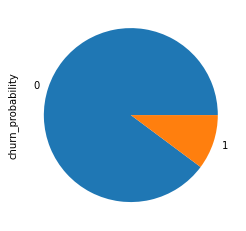

In [57]:
print((df['churn_probability'].value_counts()/len(df))*100)
((df['churn_probability'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

In [58]:
mon_6_cols = [col for col in df.columns if '_6' in col]
mon_7_cols = [col for col in df.columns if '_7' in col]
mon_8_cols = [col for col in df.columns if '_8' in col]

Printing all the columns having corr with eachother more than 80%

In [59]:
telecom_data_corr = df.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                      0.950827
arpu_2g_7           arpu_3g_7                   0.950727
total_rech_amt_6    arpu_6                      0.950457
total_rech_amt_7    arpu_7                      0.949949
arpu_2g_6           arpu_3g_6                   0.947419
arpu_2g_8           arpu_3g_8                   0.945300
total_ic_mou_6      loc_ic_mou_6                0.913620
sachet_2g_7         total_rech_data_7           0.910834
sachet_2g_8         total_rech_data_8           0.909941
total_ic_mou_8      loc_ic_mou_8                0.908380
total_ic_mou_7      loc_ic_mou_7                0.906384
sachet_2g_6         total_rech_data_6           0.902857
av_rech_amt_data_6  max_rech_data_6             0.888971
monthly_3g_6        arpu_2g_6                   0.883371
                    arpu_3g_6                   0.881054
monthly_3g_8        arpu_2g_8                   0.878623
av_rech_amt_data_8  max_rech_data_8             0.877977
av_rech_amt_data_7  max_rech_da

Dropping columns having correlation greater than 90%

In [60]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print((to_drop))

['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']


In [61]:
df.drop(to_drop,axis=1,inplace=True)

In [62]:
df.shape

(69999, 104)

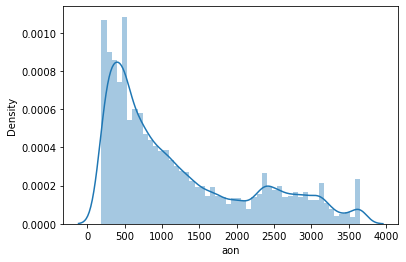

In [63]:
sns.distplot(df['aon'])
plt.show()

Plotting the correlation of independent variables with target variable

Text(0.5, 1.0, 'Features Correlating with Churn variable')

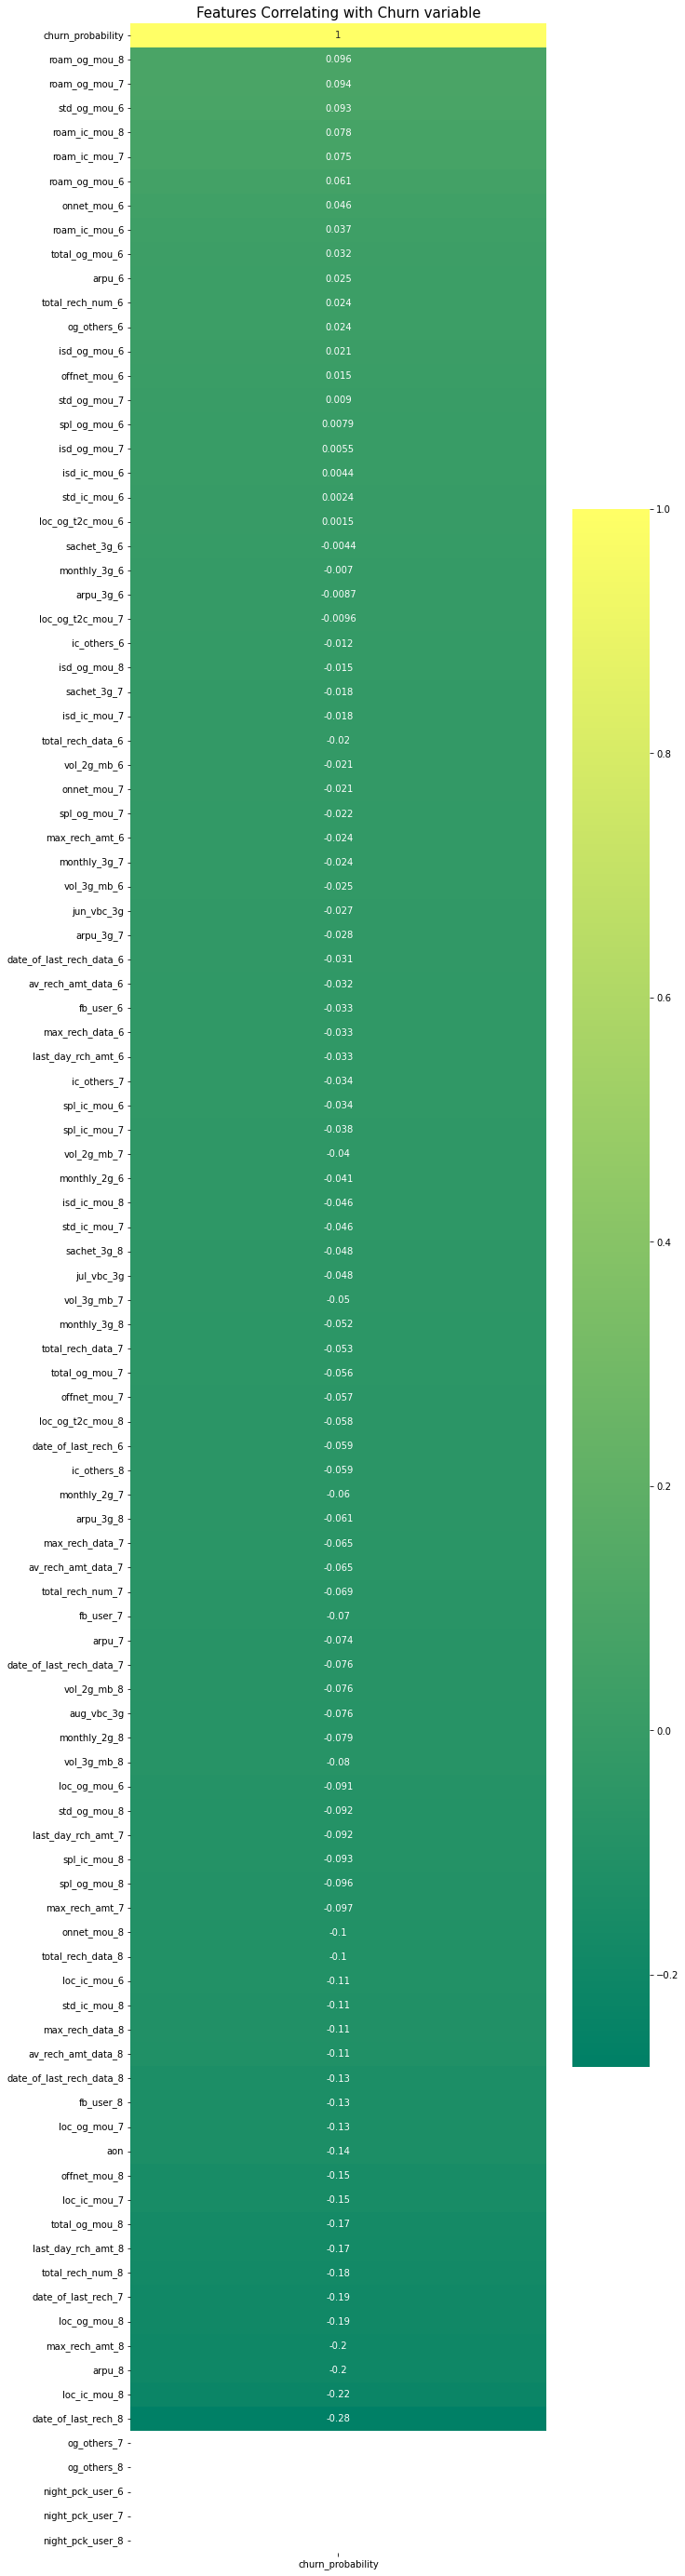

In [64]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [65]:
X = df.drop(['churn_probability'],axis=1)
y = df['churn_probability']


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

print("Number of rows and columns in X_train dataset: ", X_train.shape)
print("Number of rows and columns in y_train dataset: ", y_train.shape)
print("Number of rows and columns in X_test dataset: ", X_test.shape)
print("Number of rows and columns in y_test dataset: ", y_test.shape)

Number of rows and columns in X_train dataset:  (55999, 103)
Number of rows and columns in y_train dataset:  (55999,)
Number of rows and columns in X_test dataset:  (14000, 103)
Number of rows and columns in y_test dataset:  (14000,)


In [66]:
cols = X_train.columns

In [67]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [68]:
type(X_train)

pandas.core.frame.DataFrame

## Model Building

Logistic Regression

In [69]:
import statsmodels.api as sm

In [70]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55900
Model Family:                Binomial   Df Model:                           98
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11638.
Date:                Wed, 16 Mar 2022   Deviance:                       23277.
Time:                        14:13:55   Pearson chi2:                 4.19e+07
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2158
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4907      0.079     18.980      0.000       1.337       1.645
arpu_6                       1.0620      0.262      4.057      0.000       0.549       1.575
arpu_7                       0.9512      0.290      3.279      0.001       0.383       1.520
arpu_8                       1.1077      0.354      3.126      0.002       0.413       1.802
onnet_mou_6                  0.7949      0.436      1.822      0.069      -0.060       1.650
onnet_mou_7                  0.1001      0.522      0.192      0.848      -0.924       1.124
onnet_mou_8                 -2.7425      0.628     -4.370      0.000      -3.973      -1.512
offnet_mou_6                 0.7157      0.464      1.541      0.123      -0.194       1.626
offnet_mou_7                 0.2068      0.542      0.381      0.703      -0.856       1.270
offnet_mou_8                -2.9157      0.642     -4.538      0.000      -4.175      -1.656
roam_ic_mou_6               -0.0652      0.198     -0.329      0.742      -0.454       0.323
roam_ic_mou_7                0.3663      0.203      1.809      0.070      -0.031       0.763
roam_ic_mou_8               -0.0136      0.181     -0.075      0.940      -0.368       0.341
roam_og_mou_6                0.3899      0.202      1.930      0.054      -0.006       0.786
roam_og_mou_7                0.2523      0.198      1.276      0.202      -0.135       0.640
roam_og_mou_8                1.7566      0.188      9.319      0.000       1.387       2.126
loc_og_t2c_mou_6            -0.1330      0.147     -0.906      0.365      -0.421       0.155
loc_og_t2c_mou_7             0.3164      0.164      1.927      0.054      -0.005       0.638
loc_og_t2c_mou_8             0.2123      0.204      1.041      0.298      -0.187       0.612
loc_og_mou_6                -0.2489      0.634     -0.393      0.695      -1.491       0.993
loc_og_mou_7                -0.7914      0.753     -1.052      0.293      -2.266       0.684
loc_og_mou_8                -0.7926      1.238     -0.640      0.522      -3.218       1.633
std_og_mou_6                 0.9113      0.915      0.996      0.319      -0.883       2.705
std_og_mou_7                -0.9509      1.104     -0.861      0.389      -3.115       1.213
std_og_mou_8                 1.6796      2.060      0.815      0.415      -2.357       5.716
isd_og_mou_6                 0.1128      0.179      0.631      0.528      -0.237       0.463
isd_og_mou_7                 0.4459      0.204      2.185      0.029       0.046       0.846
isd_og_mou_8                 0.4282      0.217      1.969      0.049       0.002       0.855
spl_og_mou_6                -0.1411      0.155     -0.910      0.363      -0.445       0.163
spl_og_mou_7                 0.0181      0.179      0.101      0.919      -0.333       0.370
spl_og_mou_8  

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Feature selection using RFE

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 2),
 ('arpu_8', False, 23),
 ('onnet_mou_6', False, 33),
 ('onnet_mou_7', False, 63),
 ('onnet_mou_8', False, 3),
 ('offnet_mou_6', False, 34),
 ('offnet_mou_7', False, 77),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 73),
 ('roam_ic_mou_7', False, 26),
 ('roam_ic_mou_8', False, 79),
 ('roam_og_mou_6', False, 20),
 ('roam_og_mou_7', False, 43),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 50),
 ('loc_og_t2c_mou_7', False, 38),
 ('loc_og_t2c_mou_8', False, 51),
 ('loc_og_mou_6', False, 11),
 ('loc_og_mou_7', False, 62),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 24),
 ('std_og_mou_7', False, 75),
 ('std_og_mou_8', False, 16),
 ('isd_og_mou_6', False, 68),
 ('isd_og_mou_7', False, 25),
 ('isd_og_mou_8', False, 8),
 ('spl_og_mou_6', False, 61),
 ('spl_og_mou_7', False, 74),
 ('spl_og_mou_8', False, 13),
 ('og_others_6', False, 81),
 ('og_others_7', False, 86),
 ('og_others_8', False, 87),
 ('total_og_mou_6', False, 

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
X_train_lr = X_train.copy()

In [77]:
X_train_lr.columns[~rfe.support_]

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'date_of_las

In [78]:
import statsmodels.api as sm


In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12010.
Date:                Wed, 16 Mar 2022   Deviance:                       24021.
Time:                        14:15:10   Pearson chi2:                 1.20e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2053
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7005      0.048     14.676      0.000       0.607       0.794
arpu_6                  2.0196      0.097     20.920      0.000       1.830       2.209
offnet_mou_8           -0.8750      0.197     -4.440      0.000      -1.261      -0.489
roam_og_mou_8           1.8822      0.097     19.449      0.000       1.693       2.072
loc_og_mou_8           -3.5165      0.417     -8.428      0.000      -4.334      -2.699
loc_ic_mou_8          -12.0928      0.467    -25.875      0.000     -13.009     -11.177
std_ic_mou_8           -2.2131      0.238     -9.293      0.000      -2.680      -1.746
spl_ic_mou_8           -4.6333      0.315    -14.720      0.000      -5.250      -4.016
total_rech_num_8       -1.6606      0.171     -9.716      0.000      -1.996      -1.326
date_of_last_rech_8    -1.5942      0.062    -25.728      0.000      -1.716      -1.473
last_day_rch_amt_8     -3.3871      0.172    -19.699      0.000      -3.724      -3.050
av_rech_amt_data_8     -3.0281      0.302    -10.011      0.000      -3.621      -2.435
vol_2g_mb_8            -1.2102      0.248     -4.880      0.000      -1.696      -0.724
arpu_3g_8               2.1368      0.296      7.210      0.000       1.556       2.718
aon                    -1.4739      0.080    -18.402      0.000      -1.631      -1.317
aug_vbc_3g             -1.2601      0.225     -5.598      0.000      -1.701      -0.819
=======================================================================================
"""

In [80]:
y_train_pred = res.predict(X_train_sm)


In [81]:
y_train_pred.head(10)

id
47338.00    0.003008
67455.00    0.028650
12308.00    0.435354
52334.00    0.213457
699.98      0.557101
21003.00    0.035913
29637.00    0.014780
51051.00    0.005389
23680.00    0.062749
26306.00    0.013051
dtype: float64

In [82]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
id,,,
47338.00,0,0.003008,47338.00
67455.00,0,0.028650,67455.00
12308.00,0,0.435354,12308.00
52334.00,0,0.213457,52334.00
699.98,1,0.557101,699.98


In [83]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
id,,,,
47338.00,0,0.003008,47338.00,0
67455.00,0,0.028650,67455.00,0
12308.00,0,0.435354,12308.00,0
52334.00,0,0.213457,52334.00,0
699.98,1,0.557101,699.98,1


In [84]:
from sklearn import metrics

In [85]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[49464   825]
 [ 3871  1839]]


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.916141359667137


In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.32206654991243433

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.983594821929249

In [90]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.016405178070751057


In [91]:
# positive predictive value 
print (TP / float(TP+FP))

0.6903153153153153


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9274210180931846


In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

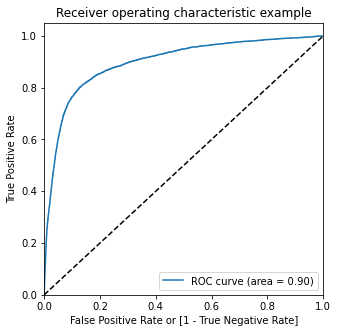

In [95]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
id,,,,,,,,,,,,,,
47338.00,0,0.003008,47338.00,0,1,0,0,0,0,0,0,0,0,0
67455.00,0,0.028650,67455.00,0,1,0,0,0,0,0,0,0,0,0
12308.00,0,0.435354,12308.00,0,1,1,1,1,1,0,0,0,0,0
52334.00,0,0.213457,52334.00,0,1,1,1,0,0,0,0,0,0,0
699.98,1,0.557101,699.98,1,1,1,1,1,1,1,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101966  1.000000  0.000000
0.1   0.1  0.794228  0.861646  0.786574
0.2   0.2  0.882659  0.770053  0.895444
0.3   0.3  0.912731  0.628021  0.945058
0.4   0.4  0.917320  0.453065  0.970033
0.5   0.5  0.916141  0.322067  0.983595
0.6   0.6  0.913677  0.228897  0.991430
0.7   0.7  0.905998  0.109982  0.996381
0.8   0.8  0.900588  0.031349  0.999284
0.9   0.9  0.898605  0.006655  0.999881


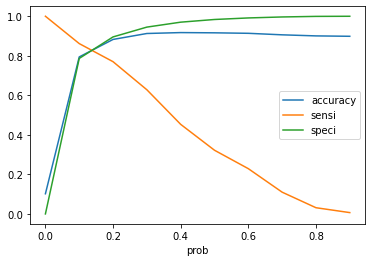

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
id,,,,,,,,,,,,,,,
47338.00,0,0.003008,47338.00,0,1,0,0,0,0,0,0,0,0,0,0
67455.00,0,0.028650,67455.00,0,1,0,0,0,0,0,0,0,0,0,0
12308.00,0,0.435354,12308.00,0,1,1,1,1,1,0,0,0,0,0,1
52334.00,0,0.213457,52334.00,0,1,1,1,0,0,0,0,0,0,0,1
699.98,1,0.557101,699.98,1,1,1,1,1,1,1,0,0,0,0,1


In [100]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7942284683655065

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[39556, 10733],
       [  790,  4920]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.861646234676007

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.7865736045656108

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21342639543438924


In [106]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3143167443940459


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9804193724284935


In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[39556, 10733],
       [  790,  4920]], dtype=int64)

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.3143167443940459

In [111]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.861646234676007

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Churn, y_train_pred_final.final_predicted

(id
 47338.00    0
 67455.00    0
 12308.00    0
 52334.00    0
 699.98      1
            ..
 37194.00    1
 6265.00     0
 54886.00    0
 860.00      0
 15795.00    0
 Name: Churn, Length: 55999, dtype: int64,
 id
 47338.00    0
 67455.00    0
 12308.00    1
 52334.00    1
 699.98      1
            ..
 37194.00    1
 6265.00     0
 54886.00    0
 860.00      0
 15795.00    0
 Name: final_predicted, Length: 55999, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

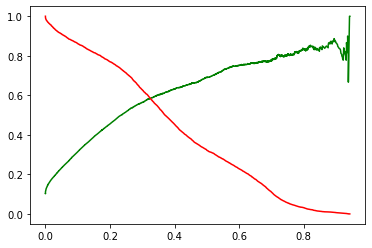

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
X_test_lr = X_test[col]
X_test_lr.head()

,arpu_6,offnet_mou_8,roam_og_mou_8,loc_og_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,date_of_last_rech_8,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_8,arpu_3g_8,aon,aug_vbc_3g
id,,,,,,,,,,,,,,,
57621.0,0.804855,0.038620,0.0,0.143486,0.136575,0.132088,0.0,0.400000,0.935484,0.065934,0.000000,0.000000,0.000000,0.138897,0.000000
39559.0,0.369385,0.283475,0.0,0.143955,0.119210,0.057683,0.0,0.314286,0.967742,0.000000,0.483813,0.007837,0.000021,0.079700,0.087873
41415.0,0.462911,0.235446,0.0,0.022799,0.025133,0.034524,0.0,0.914286,1.000000,0.065934,0.000000,0.000000,0.000000,0.062662,0.000000
47731.0,0.175620,0.015487,0.0,0.015567,0.100926,0.001458,0.0,0.314286,1.000000,0.043956,0.000000,0.000000,0.000000,0.303783,0.000000
64801.0,0.636745,0.409239,0.0,0.307780,0.258461,0.371723,0.0,0.371429,1.000000,0.000000,0.598921,0.025021,0.319681,0.390702,1.000000


In [117]:
X_test_sm = sm.add_constant(X_test_lr)


In [118]:
y_test_pred = res.predict(X_test_sm)

In [119]:
y_test.dtype

dtype('int64')

In [120]:
y_test.reset_index(drop=True, inplace=True)
y_test_pred.reset_index(drop=True, inplace=True)

In [121]:
y_test.dtype

dtype('int64')

In [122]:
y_pred_final = pd.concat([y_test,y_test_pred],axis=1)

In [123]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn_probability  14000 non-null  int64  
 1   0                  14000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 218.9 KB


In [124]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [125]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn_probability,Churn_Prob
0,0,0.060655
1,0,0.009524
2,0,0.078758
3,0,0.049756
4,0,0.000182


In [126]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [127]:
y_pred_final.head()

,churn_probability,Churn_Prob,final_predicted
0,0,0.060655,0
1,0,0.009524,0
2,0,0.078758,0
3,0,0.049756,0
4,0,0.000182,0


In [128]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn_probability  14000 non-null  int64  
 1   Churn_Prob         14000 non-null  float64
 2   final_predicted    14000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 328.2 KB


In [129]:
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_predicted)

0.797

In [130]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.final_predicted )
confusion2

array([[9917, 2661],
       [ 181, 1241]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
TP / float(TP+FN)

0.8727144866385372

In [133]:
TN / float(TN+FP)

0.7884401335665447

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(random_state=42)

In [136]:
pca.fit(X_train)

PCA(random_state=42)

In [137]:
pca.components_

array([[ 6.13398814e-02,  6.60410695e-02,  6.46573170e-02, ...,
         9.53316511e-02,  9.19596371e-02,  8.48687213e-02],
       [ 2.24264729e-01,  2.47195033e-01,  2.30797921e-01, ...,
         2.15329913e-03,  5.68213290e-05, -2.38794373e-03],
       [ 5.99669806e-02,  3.56551207e-02,  3.45193837e-02, ...,
         8.49273659e-02,  9.02903449e-02,  9.00269367e-02],
       ...,
       [-0.00000000e+00,  1.22449537e-16, -1.34074407e-16, ...,
         2.16081187e-18,  3.65500397e-17, -1.04222916e-17],
       [ 0.00000000e+00,  2.78411526e-17,  2.62903859e-17, ...,
        -2.00386427e-17,  1.00069732e-16, -9.16667053e-17],
       [-0.00000000e+00,  3.46528205e-17, -4.32292948e-17, ...,
         4.30105635e-17, -8.80062016e-17,  4.92515343e-17]])

In [138]:
pca.explained_variance_ratio_

array([2.68937311e-01, 1.03873876e-01, 5.42390883e-02, 4.25078190e-02,
       3.76053718e-02, 3.34824629e-02, 3.18238782e-02, 2.26850598e-02,
       2.04741861e-02, 1.82428382e-02, 1.73254317e-02, 1.67924942e-02,
       1.54264438e-02, 1.42994132e-02, 1.34240887e-02, 1.23877912e-02,
       1.20981643e-02, 1.10424182e-02, 1.09318114e-02, 9.78143690e-03,
       9.25653077e-03, 9.02282469e-03, 8.47757716e-03, 8.34345096e-03,
       8.21157222e-03, 7.90500855e-03, 7.68841188e-03, 7.32902862e-03,
       7.28245309e-03, 7.08386584e-03, 6.89597683e-03, 6.74590839e-03,
       6.41955831e-03, 6.32288082e-03, 5.87484520e-03, 5.77149158e-03,
       5.60635757e-03, 5.34075338e-03, 5.10403667e-03, 4.99837390e-03,
       4.53020325e-03, 4.09611683e-03, 3.83099621e-03, 3.77008633e-03,
       3.69357755e-03, 3.54430830e-03, 3.38494728e-03, 3.23081729e-03,
       2.99108372e-03, 2.78339924e-03, 2.76626655e-03, 2.67063916e-03,
       2.37832016e-03, 2.33629157e-03, 2.22738067e-03, 2.16330944e-03,
      

In [139]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

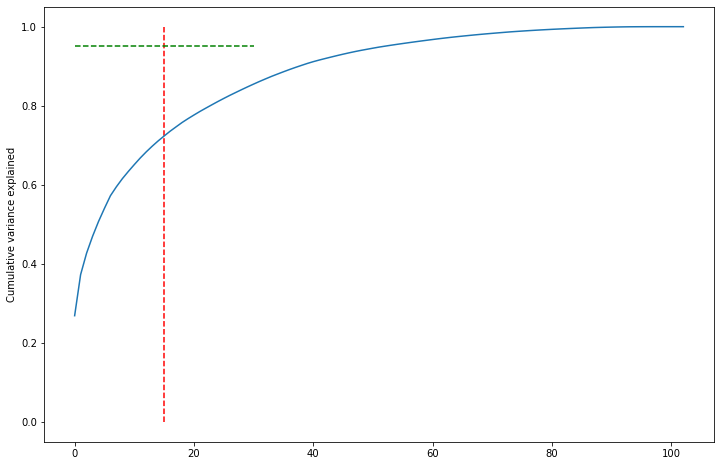

In [140]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [141]:
from sklearn.decomposition import IncrementalPCA

In [142]:
pca_final = IncrementalPCA(n_components=18)

In [143]:
df_train_pca = pca_final.fit_transform(X_train)

In [144]:
df_train_pca.shape

(55999, 18)

In [145]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [146]:
corrmat.shape

(18, 18)

<AxesSubplot:>

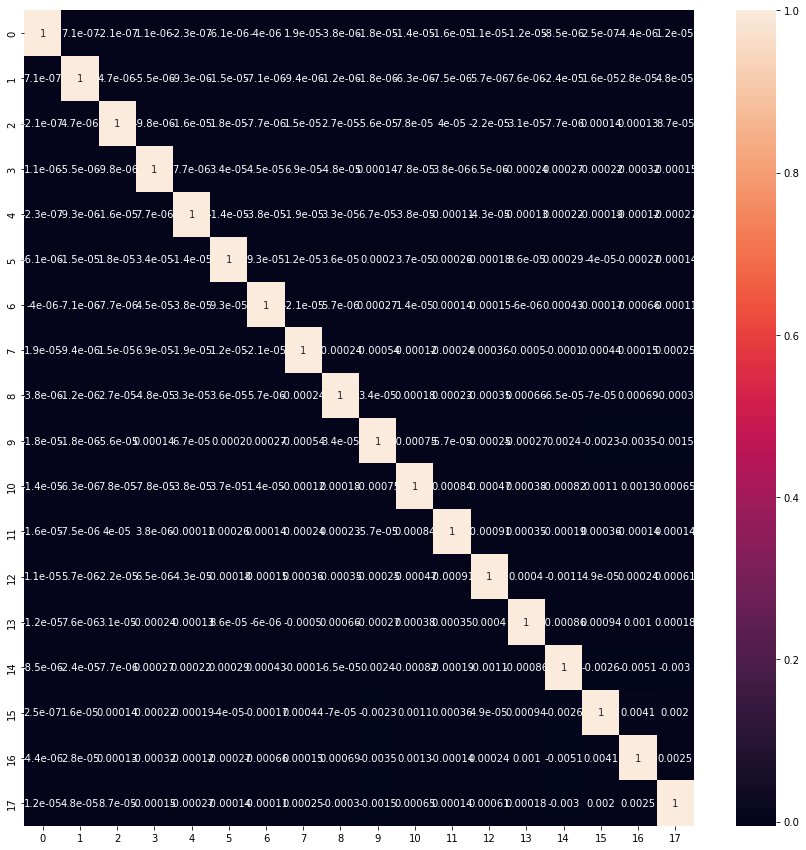

In [147]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [148]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14000, 18)

In [149]:
learner_pca = LogisticRegression()

In [150]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [152]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [153]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [164]:
len(pred_probs_test[:,1])

14000

In [167]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test[:,1]})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.112071,0
1,0,0.005568,1
2,0,0.122766,2
3,0,0.075926,3
4,0,0.001900,4


In [168]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [169]:
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,0,0.112071,0,0
1,0,0.005568,1,0
2,0,0.122766,2,0
3,0,0.075926,3,0
4,0,0.001900,4,0


In [171]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.9115714285714286

In [173]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted )
confusion2

array([[12366,   212],
       [ 1026,   396]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
TP / float(TP+FN)

0.27848101265822783

In [176]:
TN / float(TN+FP)

0.9831451741135315

Commenting eda part Right now as it will take up huge part of the notebook

In [151]:
# df_eda = df.copy()

# def analyze_numerical(df,colname,heatmap = True,plotsize_x = 10,plotsize_y = 10):
#     """
#     Generates basic information and plots for the given column
#     """
    
#     print("Value Count for " + colname)
#     print("\n")
#     print(df[colname].value_counts())
#     print("-----------------------------------------------------")
#     print("Describe for " + colname)
#     print("\n")
#     print(df[colname].describe())
#     print("-----------------------------------------------------")
#     print("Value Count for groupby series of churn_probability and " + colname)
#     print("\n")
#     print(df.groupby(['churn_probability'])[colname].describe())
#     print("-----------------------------------------------------")
    
#     sns.boxplot(df[colname])
#     plt.title("Boxplot for " + colname)
#     plt.show()
    
#     sns.displot(df[colname])
#     plt.title("Distplot for " + colname)
#     plt.show()
    
#     plt.figure(figsize=[plotsize_x,plotsize_y])
    
#     plt.subplot(2,2,1)
#     df.groupby(['churn_probability'])[colname].median().plot.bar()
#     plt.title("Bar Chart between churn_probability and " + colname + "for aggfunc median", fontsize = 10)
#     plt.subplot(2,2,2)
#     df.groupby(['churn_probability'])[colname].mean().plot.bar()
#     plt.title("Bar Chart between churn_probability and " + colname + "for aggfunc mean", fontsize = 10)
#     plt.subplot(2,2,3)
#     df.groupby(['churn_probability'])[colname].min().plot.bar()
#     plt.title("Bar Chart between churn_probability and " + colname + "for aggfunc min", fontsize = 10)
#     plt.subplot(2,2,4)
#     df.groupby(['churn_probability'])[colname].max().plot.bar()
#     plt.title("Bar Chart between churn_probability and " + colname + "for aggfunc max", fontsize = 10)
#     plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)
#     plt.show()
    
#     plt.figure(figsize=[plotsize_x,plotsize_y])
#     plt.subplot(1,2,1)
#     sns.barplot(data=df, x = 'churn_probability', y=colname, estimator= np.median)
#     plt.title("Bar Chart between churn_probability and " + colname + "for aggfunc median", fontsize = 10)
#     plt.subplot(1,2,2)
#     sns.boxplot(df['churn_probability'],df[colname])
#     plt.title("Boxplot between churn_probability and " + colname, fontsize = 10)
#     plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)
#     plt.show()
    
#     try:
#         if heatmap:
#             df[colname + '_bucket'] = pd.qcut(df[colname] , 5, ['VL','L','M', 'H', 'VH'])
#             hm_colname = pd.pivot_table(data = df,
#                     index = "churn_probability",
#                     columns = colname + '_bucket',
#                     values = colname,
#                     aggfunc = np.median)
#             print("-----------------------------------------------------")
#             print("Pivot table values with index as churn_probability, column as " + colname + " and values of loan_amnt with aggfunc of median")
#             print("\n")
#             print(hm_colname.info())
#             print(hm_colname.describe())
#             print(hm_colname.head())
#             print(hm_colname.value_counts())
#             print("-----------------------------------------------------")

#             plt.figure(figsize=[plotsize_x,plotsize_y])
#             sns.heatmap(hm_colname,cmap="Greens",annot=True)
#             plt.show()
#             plt.figure(figsize=[plotsize_x,plotsize_y])
#             hm_colname.plot.bar().legend(bbox_to_anchor=(1.0, 1.0))
#             plt.show()
#     except Exception as e:
#         print("Heatmap is not possible")
        

# col_to_analyze = list(df_eda.columns)
# col_to_analyze.remove("churn_probability")
# for col in df_eda.columns:
#     analyze_numerical(df_eda,col)


loc_og_t2o_mou : local calls within same telecom circle, outgoing calls, operator t to other operator fixed lined, minutes of usage voice calls

std_og_t2o_mou : STD calls  outside the calling circle, outgoing calls, operator t to other operator fixed lined, minutes of usage voice calls

loc_ic_t2o_mou : local calls within same telecom circle, incoming calls, operator t to other operator fixed lined, minutes of usage voice calls

arpu_6 : average revenue per user, kpi for the month of june

arpu_7 : average revenue per user, kpi for the month of july

arpu_8 : average revenue per user, kpi for the month of august

onnet_mou_6 : all kind of calls within the same operator network, minutes of usage voice calls, kpi for the month 
of june

onnet_mou_7 : all kind of calls within the same operator network, minutes of usage voice calls, kpi for the month of july

onnet_mou_8 : all kind of calls within the same operator network, minutes of usage voice calls, kpi for the month of august

offnet_mou_6 : all kind of calls outside the operator T network, minutes of usage voice calls, kpi for the month of june

offnet_mou_7 : all kind of calls outside the operator T network, minutes of usage voice calls, kpi for the month of july

offnet_mou_8 : all kind of calls outside the operator T network, minutes of usage voice calls, kpi for the month of august

roam_ic_mou_6 : indicates that customer is in roaming zone during the call, incoming calls, minutes of usage voice calls, kpi for the month of june 

roam_ic_mou_7 : indicates that customer is in roaming zone during the call, incoming calls, minutes of usage voice calls, kpi for the month of july

roam_ic_mou_8 : indicates that customer is in roaming zone during the call, incoming calls, minutes of usage voice calls, kpi for the month of august

roam_og_mou_6 : indicates that customer is in roaming zone during the call, outgoing calls, minutes of usage voice alls, kpi for the month of june

roam_og_mou_7 : indicates that customer is in roaming zone during the call, outgoing calls, minutes of usage voice calls, kpi for the month of july

roam_og_mou_8 : indicates that customer is in roaming zone during the call, outgoing calls, minutes of usage voice calls, kpi for the month of august

loc_og_t2t_mou_6

loc_og_t2t_mou_7

loc_og_t2t_mou_8

loc_og_t2m_mou_6

loc_og_t2m_mou_7

loc_og_t2m_mou_8


loc_og_t2f_mou_6

loc_og_t2f_mou_7


loc_og_t2f_mou_8

loc_og_t2c_mou_6


loc_og_t2c_mou_7

loc_og_t2c_mou_8

loc_og_mou_6



loc_og_mou_7

loc_og_mou_8

std_og_t2t_mou_6



std_og_t2t_mou_7

std_og_t2t_mou_8

std_og_t2m_mou_6




std_og_t2m_mou_7

std_og_t2m_mou_8

std_og_t2f_mou_6


std_og_t2f_mou_7

std_og_t2f_mou_8

std_og_t2c_mou_6


std_og_t2c_mou_7

std_og_t2c_mou_8


std_og_mou_6


std_og_mou_7

std_og_mou_8


isd_og_mou_6

isd_og_mou_7


isd_og_mou_8

spl_og_mou_6


spl_og_mou_7

spl_og_mou_8


og_others_6

og_others_7


og_others_8

total_og_mou_6

total_og_mou_7

total_og_mou_8

loc_ic_t2t_mou_6

loc_ic_t2t_mou_7

loc_ic_t2t_mou_8

loc_ic_t2m_mou_6

loc_ic_t2m_mou_7

loc_ic_t2m_mou_8

loc_ic_t2f_mou_6

loc_ic_t2f_mou_7

loc_ic_t2f_mou_8

loc_ic_mou_6

loc_ic_mou_7

loc_ic_mou_8

std_ic_t2t_mou_6

std_ic_t2t_mou_7

std_ic_t2t_mou_8

std_ic_t2m_mou_6

std_ic_t2m_mou_7

std_ic_t2m_mou_8

std_ic_t2f_mou_6

std_ic_t2f_mou_7

std_ic_t2f_mou_8

std_ic_t2o_mou_6

std_ic_t2o_mou_7

std_ic_t2o_mou_8

std_ic_mou_6

std_ic_mou_7

std_ic_mou_8

total_ic_mou_6

total_ic_mou_7

total_ic_mou_8

spl_ic_mou_6

spl_ic_mou_7

spl_ic_mou_8

isd_ic_mou_6

isd_ic_mou_7

isd_ic_mou_8

ic_others_6

ic_others_7

ic_others_8

total_rech_num_6

total_rech_num_7

total_rech_num_8

total_rech_amt_6

total_rech_amt_7

total_rech_amt_8

max_rech_amt_6

max_rech_amt_7

max_rech_amt_8

date_of_last_rech_6

date_of_last_rech_7

date_of_last_rech_8

last_day_rch_amt_6

last_day_rch_amt_7

last_day_rch_amt_8

date_of_last_rech_data_6

date_of_last_rech_data_7

date_of_last_rech_data_8

total_rech_data_6

total_rech_data_7

total_rech_data_8

max_rech_data_6

max_rech_data_7

max_rech_data_8

count_rech_2g_6

count_rech_2g_7

count_rech_2g_8

count_rech_3g_6

count_rech_3g_7

count_rech_3g_8

av_rech_amt_data_6


av_rech_amt_data_7

av_rech_amt_data_8

vol_2g_mb_6

vol_2g_mb_7


vol_2g_mb_8

vol_3g_mb_6


vol_3g_mb_7

vol_3g_mb_8

arpu_3g_6

arpu_3g_7

arpu_3g_8

arpu_2g_6

arpu_2g_7

arpu_2g_8

night_pck_user_6

night_pck_user_7

night_pck_user_8

monthly_2g_6

monthly_2g_7

monthly_2g_8

sachet_2g_6


sachet_2g_7

sachet_2g_8

monthly_3g_6

monthly_3g_7

monthly_3g_8

sachet_3g_6

sachet_3g_7

sachet_3g_8

fb_user_6

fb_user_7

fb_user_8

aon

aug_vbc_3g

jul_vbc_3g


jun_vbc_3g

churn_probability